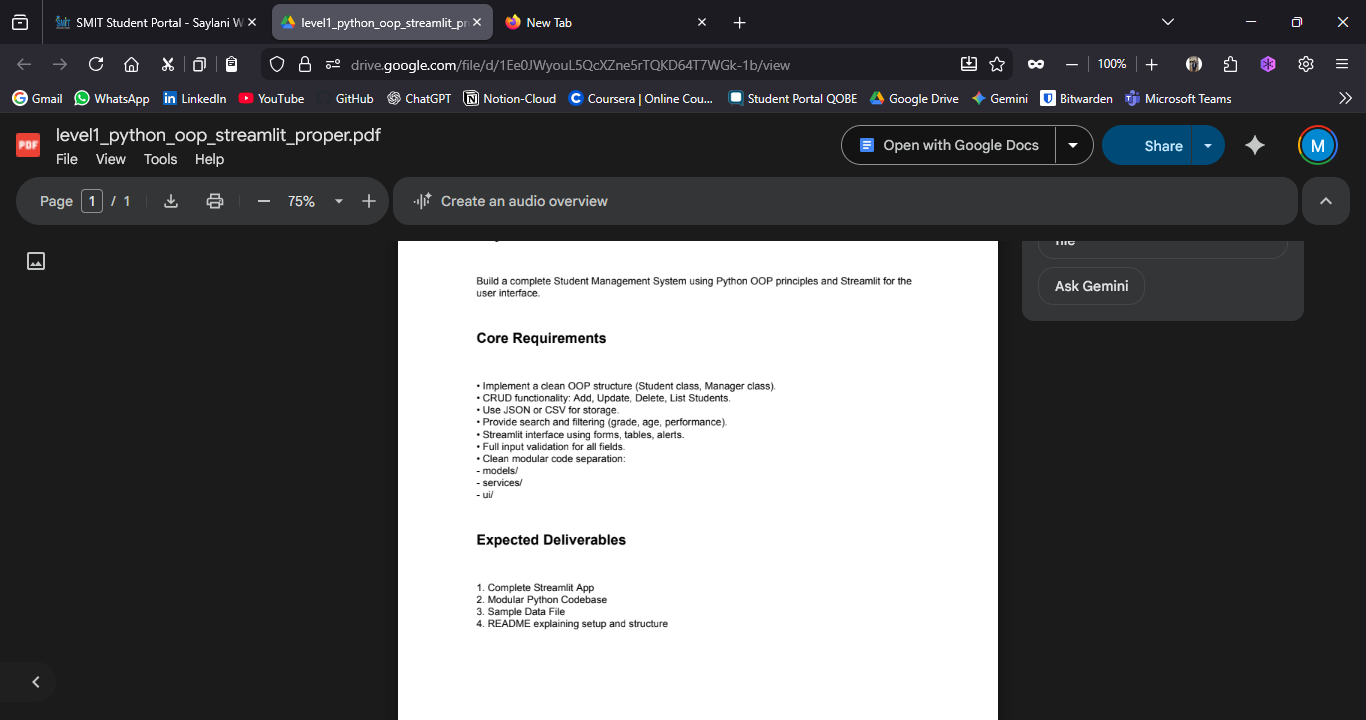

In [ ]:
#Student Class
class Student():
    def __init__(self, student_id, name, age, grade, email, phone, attendance=100.0):
        self.student_id = student_id
        self.name = name
        self.age = age
        self.grade = grade
        self.email = email
        self.phone = phone
        self.courses = []
        self.attendance = attendance
    
    def add_course(self, course):
        if course not in self.courses:
            self.courses.append(course)
    
    def remove_course(self, course):
        if course in self.courses:
            self.courses.remove(course)
    
    def to_dict(self):
        return {
            'student_id': self.student_id,
            'name': self.name,
            'age': self.age,
            'grade': self.grade,
            'email': self.email,
            'phone': self.phone,     
            'courses': self.courses,
            'attendance': self.attendance
        }
    
    def __str__(self):
        return f"ID: {self.student_id}, Name: {self.name}, Age: {self.age}, Grade: {self.grade}, Attendance: {self.attendance}%"

In [ ]:
# s1 = Student(1, "Muneeb", 21, "A", "muneeb@gmail.com", "03361026488")

In [ ]:

# s2 = Student(2, "Babar Azam", 100, "D", "Bobzie@gmail.com", "031323232323")

In [ ]:
# s2.to_dict()

{'student_id': 2,
 'name': 'Babar Azam',
 'age': 100,
 'grade': 'D',
 'email': 'Bobzie@gmail.com',
 'phone': '031323232323',
 'courses': []}

In [18]:
class Manager():
    def __init__(self):
        self.students = {}
    
    def add_student(self, student):
        """Add a new student"""
        if student.student_id in self.students:
            return False, "Student ID already exists"
        self.students[student.student_id] = student
        return True, "Student added successfully"
    
    def update_student(self, student_id, **kwargs):
        """Update student information"""
        if student_id not in self.students:
            return False, "Student not found"
        
        student = self.students[student_id]
        for key, value in kwargs.items():
            if hasattr(student, key):
                setattr(student, key, value)
        return True, "Student updated successfully"
    
    def delete_student(self, student_id):
        """Delete a student"""
        if student_id not in self.students:
            return False, "Student not found"
        del self.students[student_id]
        return True, "Student deleted successfully"
    
    def get_student(self, student_id):
        """Get a specific student"""
        return self.students.get(student_id)
    
    def list_students(self):
        """List all students"""
        return list(self.students.values())
    
    def search_students(self, **filters):
        """Search students by various criteria"""
        results = []
        for student in self.students.values():
            match = True
            for key, value in filters.items():
                if key == 'name' and value.lower() not in student.name.lower():
                    match = False
                    break
                elif key == 'grade' and student.grade != value:
                    match = False
                    break
                elif key == 'age' and student.age != value:
                    match = False
                    break
            if match:
                results.append(student)
        return results

In [ ]:
# m1 = Manager()

In [ ]:
import json
import csv
import os

class DataStorage:
    def __init__(self, json_file='students.json', csv_file='students.csv'):
        self.json_file = json_file
        self.csv_file = csv_file
    
    def save_to_json(self, manager):
        """Save students data to JSON file"""
        data = {sid: student.to_dict() for sid, student in manager.students.items()}
        with open(self.json_file, 'a+') as f:
            json.dump(data, f, indent=4)
    
    def load_from_json(self, manager):
        """Load students data from JSON file"""
        if not os.path.exists(self.json_file):
            return
        
        with open(self.json_file, 'r') as f:
            data = json.load(f)
        
        for student_data in data.values():
            student = Student(
                student_data['student_id'],
                student_data['name'],
                student_data['age'],
                student_data['grade'],
                student_data['email'],
                student_data['phone']
            )
            student.courses = student_data.get('courses', [])
            manager.students[student.student_id] = student
    
    def save_to_csv(self, manager):
        """Save students data to CSV file"""
        with open(self.csv_file, 'a+', newline='') as f:
            if manager.students:
                fieldnames = ['student_id', 'name', 'age', 'grade', 'email', 'phone', 'courses']
                writer = csv.DictWriter(f, fieldnames=fieldnames)
                writer.writeheader()
                for student in manager.students.values():
                    row = student.to_dict()
                    row['courses'] = ', '.join(row['courses'])
                    writer.writerow(row)
    
    def load_from_csv(self, manager):
        """Load students data from CSV file"""
        if not os.path.exists(self.csv_file):
            return
        
        with open(self.csv_file, 'r') as f:
            reader = csv.DictReader(f)
            for row in reader:
                student = Student(
                    row['student_id'],
                    row['name'],
                    int(row['age']),
                    row['grade'],
                    row['email'],
                    row['phone']
                )
                if row['courses']:
                    student.courses = [c.strip() for c in row['courses'].split(',')]
                manager.students[student.student_id] = student

In [43]:
manager = Manager()
storage = DataStorage()

# Testing
student1 = Student("S001", "Muneeb Chandio", 21, "A", "Chandio@gmail.com", "0336-1026222")
student1.add_course("Artificial Intelligence")
student1.add_course("Data Science")
student1.add_course("Python")

student2 = Student("S002", "Muneeb Chandio", 21, "A", "Chandio@gmail.com", "0336-1026222")
student2.add_course("Artificial Intelligence")
student2.add_course("Data Science")
student2.add_course("Python")

student3 = Student("S004", "Muneeb", 21, "A", "Muneeb-test-save-csv@gmail.com", "0336-1231231")
student3.add_course("React")
student3.add_course("JavaScript")
student3.add_course("TypeScript")

manager.add_student(student1)
manager.add_student(student2)
manager.add_student(student3)

storage.save_to_json(manager)
# storage.save_to_csv(manager)

print("Sample data created and saved!")
print(f"Total students: {len(manager.list_students())}")
for student in manager.list_students():
    print(student)

Sample data created and saved!
Total students: 3
ID: S001, Name: Muneeb Chandio, Age: 21, Grade: A
ID: S002, Name: Muneeb Chandio, Age: 21, Grade: A
ID: S004, Name: Muneeb, Age: 21, Grade: A
